# LOOPING DICE-9

- DITHER: This creates a square of 8 points around the central designated point
- RANDOM: The random selection in a small region around the designated points in the dither list such that no point is selected twice, to produce a more accurate image.
- REQUIRED: 
 - ra_dec: a RA and DEC created using 'SkyCoord'
 - big_offset: an offset for how far around the point you would like to dither. Default is 30*u.arcsec.
 - small_offset: an offset for the defined small region around the points defined in the dither list. Default is 0*u.arcsec
 - loop: a loop for how many times you would like to dither with the DICE_9 pattern. Default is 9 loop.
 - plot: a True or False input to say if user would like to plot coordinates.
- RETURNS: 'SkyCoord' as a list and a plot of coordinate positions

#### - Example: dither_dice9(ra_dec='13 37 00' , '-29 51 56.74' [in SkyCoords], big_offset=0.5\*u.deg, small_offset=0.1\*u.deg, loop=18, plot=True)

<SkyCoord (ICRS): (ra, dec) in deg
    [(204.23358079, -29.86389779), (204.58301767, -29.49430031),
     (204.56280893, -29.81795437), (204.60848289, -30.20477416),
     (204.2193201, -30.18331652), (203.86578172, -30.17006606),
     (203.87005703, -29.81790128), (203.87908777, -29.48998663),
     (204.25902535, -29.48651751), (204.25507082, -29.90231613),
     (204.62491883, -29.53629611), (204.59972612, -29.86547977),
     (204.59701656, -30.2500311), (204.2152962, -30.24493282),
     (203.87626865, -30.22339121), (203.93743739, -29.84626771),
     (203.86384158, -29.53802359), (204.22642972, -29.47352943)]>


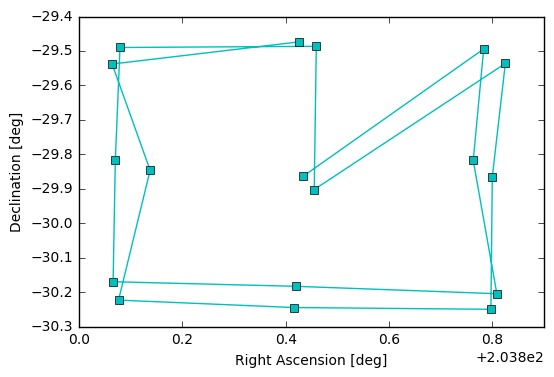

In [1]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import itertools
import math
import random
import matplotlib.pyplot as plt


ra='13 37 00'
dec='-29 51 56.74'
ra_dec=SkyCoord('%s %s'%(ra, dec), unit=(u.hourangle,u.deg))
big_offset=0.5*u.deg
small_offset=0.1*u.deg
loop=18

def dither_dice9(ra_dec, big_offset,small_offset=0*u.arcsec, loop=9, plot=True):
    if not isinstance(big_offset,u.Quantity):
        big_offset=big_offset*u.arcsec
    if not isinstance(small_offset,u.Quantity):
        small_offset=small_offset*u.arcsec
    ra=ra_dec.ra
    dec=ra_dec.dec
    number=math.ceil(loop/9.0)
    big=(0.5*2**0.5)*big_offset  #0.5*2**0.5 is due to adjacent side in a right angle triangle (cos45)
    small= (small_offset*0.5)
    """Dither"""
    RA_list=[ra]
    DEC_list=[dec]
    for _ in itertools.repeat(None, number):
        ra1=ra+(big)
        RA_list.append(ra1)
        dec1=dec+(big)
        DEC_list.append(dec1)
        
        ra2=ra+(big)
        RA_list.append(ra2)
        DEC_list.append(dec)
        
        ra3=ra+(big)
        RA_list.append(ra3)
        dec3=dec-(big)
        DEC_list.append(dec3)
        
        RA_list.append(ra)
        dec4=dec-(big)
        DEC_list.append(dec4)
        
        ra5=ra-(big)
        RA_list.append(ra5)
        dec5=dec-(big)
        DEC_list.append(dec5)
        
        ra6=ra-(big)
        RA_list.append(ra6)
        DEC_list.append(dec)
        
        ra7=ra-(big)
        RA_list.append(ra7)
        dec7=dec+(big)
        DEC_list.append(dec7)
        
        RA_list.append(ra)
        dec8=dec+(big)
        DEC_list.append(dec8)
        
        
        RA_list.append(ra)
        DEC_list.append(dec)
        
    
    
    RA_final_list=RA_list[:loop]
    DEC_final_list=DEC_list[:loop]
    """Random"""
    LISTra=[]
    LISTdec=[]
    for i in range(0,len(RA_final_list)):
        RA_offset=random.uniform(RA_final_list[i]-(small),RA_final_list[i]+(small))
        LISTra.append(RA_offset)
        DEC_offset=random.uniform(DEC_final_list[i]-(small),DEC_final_list[i]+(small))
        LISTdec.append(DEC_offset)
    All=SkyCoord(LISTra,LISTdec)
    print (All)
    if plot==True:
        plt.plot(All.ra, All.dec,'c-s')
        plt.ylabel('Declination [deg]')
        plt.xlabel('Right Ascension [deg]')
        plt.show()
    return All

All9=dither_dice9(ra_dec,big_offset, small_offset,loop)

# LOOPING DICE-5

- DITHER: This creates a square of 4 points around the central designated point
- RANDOM: The random selection in a small region around the designated points in the dither list such that no point is selected twice, to produce a more accurate image.
- REQUIRED: 
 - ra_dec: a RA and DEC created using 'SkyCoord'
 - big_offset: an offset for how far around the point you would like to dither. Default is 30*u.arcsec.
 - small_offset: an offset for the defined small region around the points defined in the dither list. Default is 0*u.arcsec
 - loop: a loop for how many times you would like to dither with the DICE_5 pattern. Default is 5 loop.
 - plot: a True or False input to say if user would like to plot coordinates.
- RETURNS: 'SkyCoord' as a list and a plot of coordinate positions

#### - Example: dither_dice9(ra_dec='13 37 00' , '-29 51 56.74' [in SkyCoords], big_offset=0.5\*u.deg, small_offset=0.1\*u.deg, loop=10, plot=True)

<SkyCoord (ICRS): (ra, dec) in deg
    [(204.23488798, -29.82855076), (204.59372566, -29.56089661),
     (204.55663082, -30.2396852), (203.87175148, -30.19558078),
     (203.88038277, -29.56035543), (204.28754433, -29.85393732),
     (204.61876528, -29.52179559), (204.55620469, -30.18239559),
     (203.87863433, -30.20377885), (203.88144544, -29.5334441)]>


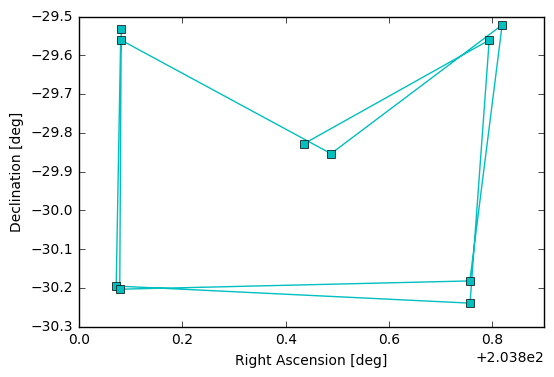

In [2]:
import astropy.units as u
from astropy.coordinates import SkyCoord
import math
import itertools
import matplotlib.pyplot as plt

ra='13 37 00'
dec='-29 51 56.74'
ra_dec=SkyCoord('%s %s'%(ra, dec), unit=(u.hourangle,u.deg))
big_offset=0.5*u.deg
small_offset=0.1*u.deg
loop=10


def dither_dice5(ra_dec, big_offset,small_offset=0*u.arcsec, loop=5, plot=True):
    if not isinstance(big_offset,u.Quantity):
        big_offset=big_offset*u.arcsec
    if not isinstance(small_offset,u.Quantity):
        small_offset=small_offset*u.arcsec
    ra=ra_dec.ra
    dec=ra_dec.dec
    number=math.ceil(loop/5.0)
    big=(0.5*2**0.5)*big_offset  #0.5*2**0.5 is due to adjacent side in a right angle triangle (cos45)
    small= (small_offset*0.5)
    """Dither"""
    RA_list=[ra]
    DEC_list=[dec]
    for _ in itertools.repeat(None, number):
        ra1=ra+(big)
        RA_list.append(ra1)
        dec1=dec+(big)
        DEC_list.append(dec1)
        
        ra2=ra+(big)
        RA_list.append(ra2)
        dec2=dec-(big)
        DEC_list.append(dec2)
        
        ra3=ra-(big)
        RA_list.append(ra3)
        dec3=dec-(big)
        DEC_list.append(dec3)
        
        ra4=ra-(big)
        RA_list.append(ra4)
        dec4=dec+(big)
        DEC_list.append(dec4)
        
        RA_list.append(ra)
        DEC_list.append(dec)
        
    
    RA_final_list=RA_list[:loop]
    DEC_final_list=DEC_list[:loop]
    """Random"""
    LISTra=[]
    LISTdec=[]
    for i in range(0,len(RA_final_list)):
        RA_offset=random.uniform(RA_final_list[i]-(small),RA_final_list[i]+(small))
        LISTra.append(RA_offset)
        DEC_offset=random.uniform(DEC_final_list[i]-(small),DEC_final_list[i]+(small))
        LISTdec.append(DEC_offset)
    All=SkyCoord(LISTra,LISTdec)
    print (All)
    if plot==True:
        plt.plot(All.ra, All.dec,'c-s')
        plt.ylabel('Declination [deg]')
        plt.xlabel('Right Ascension [deg]')
        plt.show()
    return All

All5=dither_dice5(ra_dec,big_offset, small_offset,loop)